In [2]:
import matplotlib.pyplot as plt
import seaborn
import warnings, os, glob ,subprocess
import pandas as pd
import numpy as np

# Suppress Matplotlib warnings
warnings.filterwarnings("ignore", category=UserWarning)
pd.set_option('display.max_rows', 500)

for subdir in [ "Celldata_sum_of_mixture"]:
    OUTPUT_DIR = "/data/project/Alzheimer/YSscript/cle/Revision/" + str (subdir)
    if os.path.exists(OUTPUT_DIR) == False:
        os.system("mkdir -p " + OUTPUT_DIR)

In [49]:
DEPTH_DIRS = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/01.INPUT_TSV/2.CellData/CellData_1D/*x") )
long_df = pd.DataFrame ( columns = ["DEPTH", "TSV", "LABEL", "NPVAF", "CHRPOS", "SUM_MIXTURE_CHILD"] )

for DEPTH_DIR in DEPTH_DIRS:
    DEPTH = DEPTH_DIR.split("/")[-1].split("x")[0]
    TSV_DIRS = sorted ( glob.glob (DEPTH_DIR + "/*"))
    print ("{}x".format (DEPTH))
    for TSV_DIR in TSV_DIRS:
        if ( "M3" in TSV_DIR.split("/")[-1] ) | ("-9" in TSV_DIR.split("/")[-1]) | ("-10" in TSV_DIR.split("/")[-1]) | ("-11" in TSV_DIR.split("/")[-1])  | ("12" in TSV_DIR.split("/")[-1])  | ("-1" in TSV_DIR.split("/")[-1]) | ("-3" in TSV_DIR.split("/")[-1])  | ("-5" in TSV_DIR.split("/")[-1])  | ("-7" in TSV_DIR.split("/")[-1])  :
            continue

        inputdf = pd.read_csv (TSV_DIR, sep = "\t", names = ["CHRPOS", "LABEL", "DEPTHALT", "BQ"] )
        inputdf ["DEPTH"] = DEPTH
        inputdf ["NPVAF"] = inputdf["DEPTHALT"].str.split(",").str[1].astype("int")  /  inputdf["DEPTHALT"].str.split(",").str[0].astype ("int")
        inputdf ["DEP"] = inputdf["DEPTHALT"].str.split(",").str[0].astype ("int")
        inputdf ["TSV"] = TSV_DIR.split("/")[-1].split("_input")[0]
        inputdf = inputdf [ inputdf["DEP"] >= 10].drop (columns = "DEP", axis = 1  )
        
        mean_inputdf = pd.DataFrame ( inputdf.groupby( "LABEL" )["NPVAF"].mean() )
        sum_mixture_child = np.sum ( mean_inputdf.loc[ list( {'S0', 'V1', 'V2', 'V3', 'V4'}.intersection(mean_inputdf.index) ) ]["NPVAF"].astype("float") * 2 ) 
        inputdf ["SUM_MIXTURE_CHILD"] = sum_mixture_child
        
        long_df = pd.concat ( [  long_df, inputdf [ ["DEPTH", "TSV", "LABEL", "NPVAF", "CHRPOS", "SUM_MIXTURE_CHILD"] ]  ], axis = 0 )

long_df["DEPTH"] = long_df["DEPTH"].astype ("int")
long_df = long_df.sort_values (by = 'DEPTH', axis = 0).reset_index ( drop = True)
long_df = long_df [long_df["LABEL"].isin ( ["S0", "V1", "V2", "V3", "V4"])].drop_duplicates(['DEPTH', 'TSV', 'SUM_MIXTURE_CHILD'], keep = 'first')[ ["DEPTH","TSV", "SUM_MIXTURE_CHILD" ]]

100x
1100x
125x
250x
30x
60x


<ipython-input-61-7a61e4f60f35>:15: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot ( long_df , x = "DEPTH", y = "SUM_MIXTURE_CHILD", palette = colorlist, size = 8, edgecolor = "white", linewidth = 0.5)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


        DEPTH   TSV  SUM_MIXTURE_CHILD
0          30  M2-2           1.417430
1          30  M2-4           1.384033
3037       30  M1-8           1.233851
6073       30  M2-8           1.415207
7021       30  M2-6           1.343394
12143      30  M1-2           1.280535
12145      30  M1-4           1.279689
12262      30  M1-6           1.271105
24286      60  M1-4           1.130611
27510      60  M1-2           1.125913
30736      60  M2-8           1.173293
30739      60  M2-4           1.157325
32660      60  M2-6           1.144896
34581      60  M2-2           1.209718
46108      60  M1-6           1.099693
53792      60  M1-8           1.085990
61475     100  M1-2           1.072654
61476     100  M2-6           1.071647
61477     100  M2-4           1.088368
63197     100  M2-2           1.128319
67327     100  M1-8           1.035561
72490     100  M2-8           1.094911
83504     100  M1-4           1.073279
84192     100  M1-6           1.039521
105528    125  M2-4      

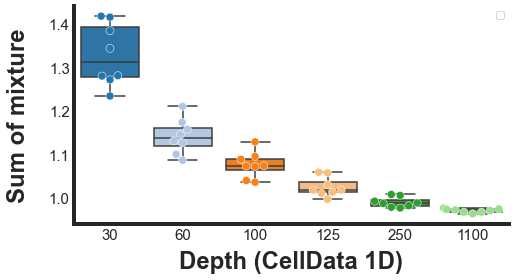

In [61]:
import palettable
import matplotlib 
matplotlib.rcParams["font.family"] = 'arial'
import matplotlib.pyplot as plt
import seaborn as sns
tabl = palettable.tableau.Tableau_20.mpl_colors
colorlist = [i for i in tabl]
sns.set_style("white")

fig, ax = plt.subplots( nrows = 1, ncols = 1, figsize = (7.8, 4))


print (long_df)
sns.boxplot ( long_df , x = "DEPTH", y = "SUM_MIXTURE_CHILD", palette = colorlist, saturation = 0.8)
sns.swarmplot ( long_df , x = "DEPTH", y = "SUM_MIXTURE_CHILD", palette = colorlist, size = 8, edgecolor = "white", linewidth = 0.5)

sns.despine ( top = True, right = True, ax = ax)
for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth( 4 )

ax.set_xlabel( "Depth (CellData 1D)", fontsize = 24, fontweight = "semibold"  )
ax.set_ylabel( "Sum of mixture", fontsize = 24, fontweight = "semibold"  )
ax.xaxis.set_label_coords( 0.5, -0.12)  # xlabel을 이동 (- 아래쪽)
ax.yaxis.set_label_coords( -0.1, 0.5)  # ylabel을 이동 (- 왼쪽)
ax.set_xticklabels ( ax.get_xticklabels(), fontsize = 15, fontweight = "normal" ) 
ax.set_yticklabels ( np.round (ax.get_yticks(), 1), fontsize = 15, fontweight = "normal" ) 
ax.tick_params(axis='x', direction='out', length = 3, pad = 1)
ax.tick_params(axis='y', direction='out', length = 3, pad = 1)
#ax.legend( loc = "upper right")


In [18]:
pd.DataFrame ( long_df.drop_duplicates(['DEPTH', 'TSV', 'SUM_MIXTURE_CHILD'], keep = 'first')[ ["DEPTH","TSV", "SUM_MIXTURE_CHILD" ]].groupby ("DEPTH")["SUM_MIXTURE_CHILD"]  )

,0,1
0,100,0 1.072654 0 1.073279 0 1.039521 0 ...
1,1100,0 0.973537 0 0.971748 0 0.966672 0 ...
2,125,0 1.058449 0 1.017594 0 1.010268 0 ...
3,250,0 1.007319 0 0.987848 0 0.981566 0 ...
4,30,0 1.280535 0 1.279689 0 1.271105 0 ...
5,60,0 1.125913 0 1.130611 0 1.099693 0 ...
